In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
# URL of the IMDb Top 250 movies chart
url = 'https://www.imdb.com/chart/top/'

# Define headers to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Fetch the content from the URL with headers
response = requests.get(url, headers=headers)
response

<Response [200]>

In [3]:
soup = BeautifulSoup(response.text,'html')

In [4]:
def convert_duration(duration):
    hours = 0
    minutes = 0
    if 'H' in duration:
        hours = int(duration.split('H')[0].replace('PT', ''))
    if 'M' in duration:
        minutes_part = duration.split('H')[-1] if 'H' in duration else duration.replace('PT', '')
        minutes = int(minutes_part.replace('M', ''))
    return f"{hours}h {minutes}m"

In [5]:
import json
import csv
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the script tag with type "application/ld+json"
    script_tag = soup.find('script', type='application/ld+json')
    
    if script_tag:
        # Parse the JSON content
        json_content = json.loads(script_tag.string)

        # Define the CSV file name
        filename = 'imdb.csv'

        # Specify the column names for the CSV
        fieldnames = ['Title', 'Link', 'Rating', 'Description', 'Genre', 'Duration (hrs)']

        # Write the movie details to the CSV file
        with open(filename, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)

            # Write the header row
            writer.writeheader()
        
            # Extract movie data
            for item in json_content['itemListElement']:
                movie = item['item']
                title = movie['name']
                link = movie['url']
                rating = movie['aggregateRating']['ratingValue']
                description = movie['description']
                genre = movie['genre']
                duration = movie['duration']
                total_hours = convert_duration(duration)
                
                # Write the movie details to the CSV file
                writer.writerow({
                    'Title': title,
                    'Link': link,
                    'Rating': rating,
                    'Description': description,
                    'Genre': genre,
                    'Duration (hrs)': total_hours
                })

        print(f"Data successfully saved to {filename}")
    else:
        print('The specified script tag was not found.')
else:
    print('Failed to retrieve the webpage. Status code:', response.status_code)

Data successfully saved to imdb.csv


In [6]:
import pandas as pd
df = pd.read_csv('imdb.csv', encoding = 'latin1')
df

,Title,Link,Rating,Description,Genre,Duration (hrs)
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,"Over the course of several years, two convicts...",Drama,2h 22m
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,The aging patriarch of an organized crime dyna...,"Crime, Drama",2h 55m
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",2h 32m
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,The early life and career of Vito Corleone in ...,"Crime, Drama",3h 22m
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,The jury in a New York City murder trial is fr...,"Crime, Drama",1h 36m
...,...,...,...,...,...,...
245,It Happened One Night,https://www.imdb.com/title/tt0025316/,8.1,A rogue reporter trailing a runaway heiress fo...,"Comedy, Romance",1h 45m
246,Drishyam,https://www.imdb.com/title/tt4430212/,8.2,Desperate measures are taken by a man who trie...,"Crime, Drama, Mystery",2h 43m
247,Aladdin,https://www.imdb.com/title/tt0103639/,8.0,A kind-hearted street urchin and a power-hungr...,"Animation, Adventure, Comedy",1h 30m
248,Dances with Wolves,https://www.imdb.com/title/tt0099348/,8.0,"Lieutenant John Dunbar, assigned to a remote w...","Adventure, Drama, Western",3h 1m


In [12]:
drama_movies = df[df['Genre'].str.contains('Drama')]
# Print the titles of drama movies
for title in drama_movies['Title']:
    print(title)

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather Part II
12 Angry Men
Schindler&apos;s List
The Lord of the Rings: The Return of the King
Pulp Fiction
The Lord of the Rings: The Fellowship of the Ring
Il buono, il brutto, il cattivo
Forrest Gump
The Lord of the Rings: The Two Towers
Fight Club
Goodfellas
One Flew Over the Cuckoo&apos;s Nest
Se7en
Interstellar
It&apos;s a Wonderful Life
Shichinin no samurai
The Silence of the Lambs
Saving Private Ryan
Cidade de Deus
La vita Ã¨ bella
The Green Mile
The Pianist
Dune: Part Two
Gisaengchung
Gladiator
The Lion King
The Departed
LÃ©on
American History X
Whiplash
The Prestige
Hotaru no haka
Seppuku
The Usual Suspects
Casablanca
Intouchables
Nuovo Cinema Paradiso
Modern Times
C&apos;era una volta il West
City Lights
Django Unchained
Apocalypse Now
12th Fail
Das Leben der Anderen
Sunset Blvd.
Paths of Glory
Witness for the Prosecution
The Shining
The Great Dictator
Inglourious Basterds
The Dark Knight Rises
Coco
Oldeuboi
Amad

In [15]:
high_rating_movies = df[df['Rating'] > 8]

# Print the titles of movies with a rating greater than 8
for title in high_rating_movies['Title']:
    print(title)

The Shawshank Redemption
The Godfather
The Dark Knight
The Godfather Part II
12 Angry Men
Schindler&apos;s List
The Lord of the Rings: The Return of the King
Pulp Fiction
The Lord of the Rings: The Fellowship of the Ring
Il buono, il brutto, il cattivo
Forrest Gump
The Lord of the Rings: The Two Towers
Fight Club
Inception
Star Wars: Episode V - The Empire Strikes Back
The Matrix
Goodfellas
One Flew Over the Cuckoo&apos;s Nest
Se7en
Interstellar
It&apos;s a Wonderful Life
Shichinin no samurai
The Silence of the Lambs
Saving Private Ryan
Cidade de Deus
La vita Ã¨ bella
The Green Mile
Terminator 2: Judgment Day
Star Wars
Back to the Future
Sen to Chihiro no kamikakushi
The Pianist
Dune: Part Two
Gisaengchung
Psycho
Gladiator
Spider-Man: Across the Spider-Verse
The Lion King
The Departed
LÃ©on
American History X
Whiplash
The Prestige
Hotaru no haka
Seppuku
The Usual Suspects
Casablanca
Intouchables
Nuovo Cinema Paradiso
Modern Times
Rear Window
C&apos;era una volta il West
Alien
City Ligh

In [16]:
top_10 = high_rating_movies[0:10]
top_10

,Title,Link,Rating,Description,Genre,Duration (hrs)
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,9.3,"Over the course of several years, two convicts...",Drama,2h 22m
1,The Godfather,https://www.imdb.com/title/tt0068646/,9.2,The aging patriarch of an organized crime dyna...,"Crime, Drama",2h 55m
2,The Dark Knight,https://www.imdb.com/title/tt0468569/,9.0,When the menace known as the Joker wreaks havo...,"Action, Crime, Drama",2h 32m
3,The Godfather Part II,https://www.imdb.com/title/tt0071562/,9.0,The early life and career of Vito Corleone in ...,"Crime, Drama",3h 22m
4,12 Angry Men,https://www.imdb.com/title/tt0050083/,9.0,The jury in a New York City murder trial is fr...,"Crime, Drama",1h 36m
5,Schindler&apos;s List,https://www.imdb.com/title/tt0108052/,9.0,"In German-occupied Poland during World War II,...","Biography, Drama, History",3h 15m
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/,9.0,Gandalf and Aragorn lead the World of Men agai...,"Action, Adventure, Drama",3h 21m
7,Pulp Fiction,https://www.imdb.com/title/tt0110912/,8.9,"The lives of two mob hitmen, a boxer, a gangst...","Crime, Drama",2h 34m
8,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/,8.9,A meek Hobbit from the Shire and eight compani...,"Action, Adventure, Drama",2h 58m
9,"Il buono, il brutto, il cattivo",https://www.imdb.com/title/tt0060196/,8.8,A bounty hunting scam joins two men in an unea...,"Adventure, Drama, Western",2h 41m


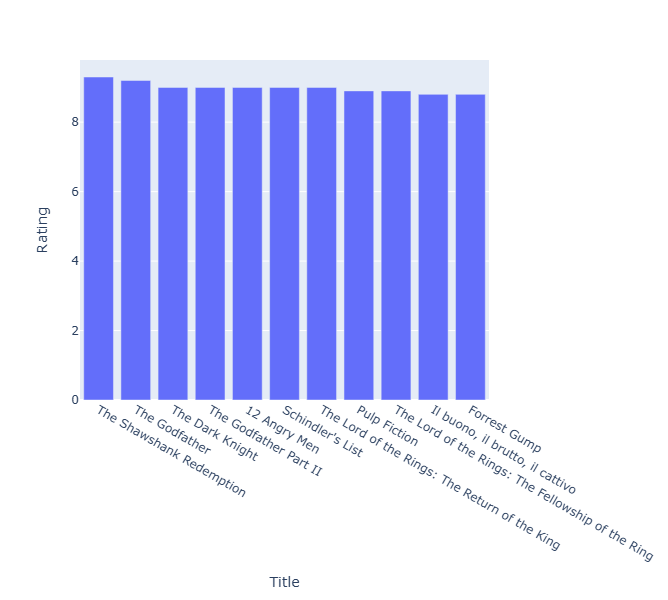

In [19]:
import plotly.express as px
fig = px.bar(high_rating_movies.loc[0:10], x = "Title", y = "Rating", height=600, width=800)
fig.show()

In [20]:
import csv

# Assuming 'df' is your DataFrame
# Save the DataFrame to a CSV file starting the index from 1 after the header
df.to_csv('imdb.csv', index_label='Index')

# Read the CSV file
with open('imdb.csv', 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip the header row
    for idx, row in enumerate(reader, start=1):
        print(f'{idx + 1}: {row}')


2: ['0', 'The Shawshank Redemption', 'https://www.imdb.com/title/tt0111161/', '9.3', 'Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.', 'Drama', '2h 22m']
3: ['1', 'The Godfather', 'https://www.imdb.com/title/tt0068646/', '9.2', 'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.', 'Crime, Drama', '2h 55m']
4: ['2', 'The Dark Knight', 'https://www.imdb.com/title/tt0468569/', '9.0', 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.', 'Action, Crime, Drama', '2h 32m']
5: ['3', 'The Godfather Part II', 'https://www.imdb.com/title/tt0071562/', '9.0', 'The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family 